# TUGAS PRAKTIKUM

#### NAMA     : AHMED FATHIR SYAFAAT
#### KELAS    : TI - 3H
#### NIM      : 2241720083

## *Tugas 1: Multiple Linear Regression*
**Catatan Tambahan:**
- Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
- Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
- Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [13]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [14]:
# read data
data = pd.read_csv('assets/insurance.csv')

In [15]:
# lihat beberapa data awal
data.head()

# cek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

c:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


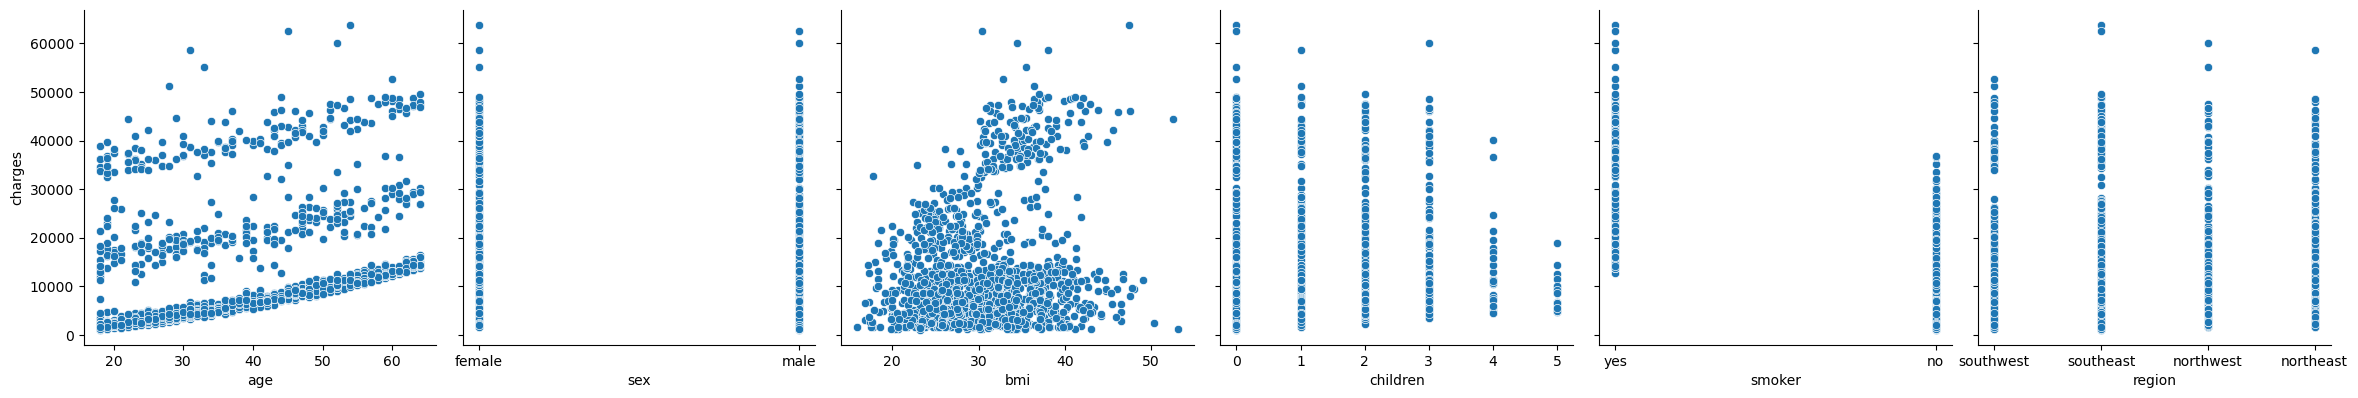

In [16]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
            y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

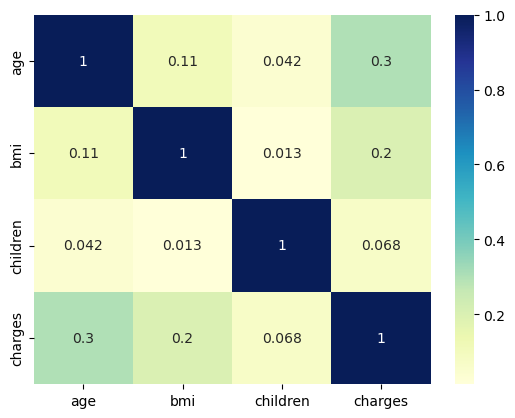

In [19]:
# memilih hanya kolom numerik
numerical_data = data.select_dtypes(include=[np.number])

# visualisasi korelasi dengan heatmap
sns.heatmap(numerical_data.corr(), cmap="YlGnBu", annot=True)
plt.show()


2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [20]:
# membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data[['age', 'bmi']]
y = data['charges']

In [21]:
# membagi data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

3. Lakukan feature scaling jika diperlukan.

In [22]:
from sklearn.preprocessing import MinMaxScaler

# inisialisasi objek scaler
scaler = MinMaxScaler()

# melakukan scaling pada data latih
X_train_scaled = scaler.fit_transform(X_train)

# melakukan scaling pada data uji dengan menggunakan parameter yang sama seperti pada data latih
X_test_scaled = scaler.transform(X_test)


4. Buat model multiple linear regression menggunakan Scikit-Learn.

In [23]:
from sklearn.linear_model import LinearRegression

# inisialisasi objek model
model = LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [24]:
# melatih model dengan data latih yang sudah discaled
model.fit(X_train_scaled, y_train)

# melakukan prediksi pada data uji yang sudah discaled
y_pred = model.predict(X_test_scaled)

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

Mean Squared Error (MSE): 129696311.34332742
Mean Absolute Error (MAE): 8919.311771816696
R-squared (R2): 0.10676050395208692
Root Mean Squared Error (RMSE): 11388.4288355913


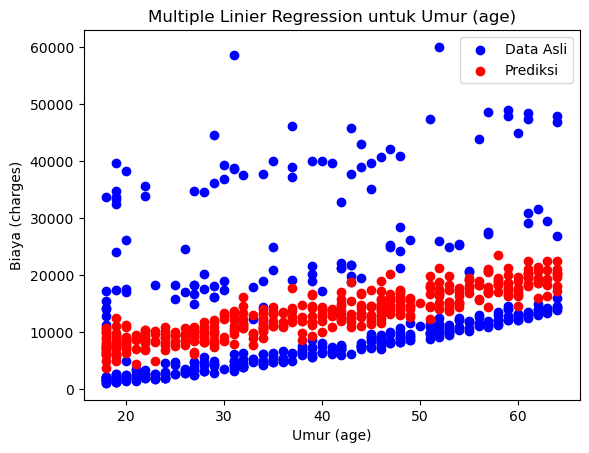

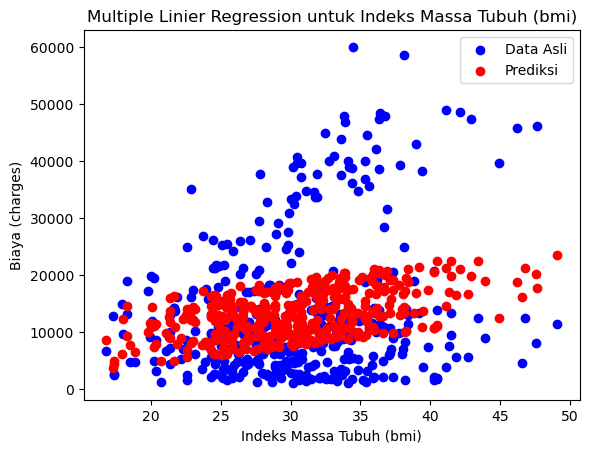

In [25]:
# menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# menghitung metrik evaluasi (misalnya, RMSE dan R-squared)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

# membuat plot multiple linier regression untuk age
plt.scatter(X_test['age'], y_test, color='blue', label='Data Asli')
plt.scatter(X_test['age'], y_pred, color='red', label='Prediksi')
plt.xlabel("Umur (age)")
plt.ylabel("Biaya (charges)")
plt.title("Multiple Linier Regression untuk Umur (age)")
plt.legend()
plt.show()

# membuat plot multiple linier regression untuk bmi
plt.scatter(X_test['bmi'], y_test, color='blue', label='Data Asli')
plt.scatter(X_test['bmi'], y_pred, color='red', label='Prediksi')
plt.xlabel("Indeks Massa Tubuh (bmi)")
plt.ylabel("Biaya (charges)")
plt.title("Multiple Linier Regression untuk Indeks Massa Tubuh (bmi)")
plt.legend()
plt.show()
